In [1]:
"""Dataset for CBP."""
import os
import torch
import numpy as np
from einops import rearrange
import ffcv
from ffcv.writer import DatasetWriter
from ffcv.fields import NDArrayField, FloatField

from wavebench.dataloaders.rtc_loader import RtcDataset
from wavebench.dataloaders.is_loader import IsDataset

from wavebench import wavebench_dataset_path
import torch
import numpy as np



In [2]:
# problem = 'is'
# dataset_name='thick_lines'
# medium_type='gaussian_lens'

for problem in ['rtc', 'is']:
  for dataset_name in ['thick_lines', 'mnist']:
    for medium_type in ['gaussian_lens', 'gaussian_random_field']:
      print(problem, dataset_name, medium_type)
      if problem == 'rtc':
        dataset_path = os.path.join(wavebench_dataset_path, "time_varying/rtc")
        dataset = RtcDataset(
          dataset_name=dataset_name,
          medium_type=medium_type,
          numpy=True)
      elif problem == 'is':
        dataset_path = os.path.join(wavebench_dataset_path, "time_varying/is")
        dataset = IsDataset(
          dataset_name=dataset_name,
          medium_type=medium_type,
          numpy=True)

      write_path = f'{dataset_path}/{dataset_name}_{medium_type}.beton'
      writer = DatasetWriter(write_path, {
          'input': NDArrayField(shape=(1, 128, 128), dtype=np.dtype('float32')),
          'target': NDArrayField(shape=(1, 128, 128), dtype=np.dtype('float32')),
          }, num_workers=12)

      writer.from_indexed_dataset(dataset)


rtc thick_lines gaussian_lens


100%|██████████| 5000/5000 [00:00<00:00, 7088.24it/s] 


rtc thick_lines gaussian_random_field


100%|██████████| 5000/5000 [00:00<00:00, 8274.02it/s] 

rtc mnist gaussian_lens



100%|██████████| 50/50 [00:00<00:00, 497.87it/s]

rtc mnist gaussian_random_field



100%|██████████| 50/50 [00:00<00:00, 498.09it/s]


is thick_lines gaussian_lens


100%|██████████| 5000/5000 [00:00<00:00, 8276.98it/s] 


is thick_lines gaussian_random_field


100%|██████████| 5000/5000 [00:00<00:00, 7087.12it/s] 

is mnist gaussian_lens



100%|██████████| 50/50 [00:00<00:00, 497.37it/s]

is mnist gaussian_random_field



100%|██████████| 50/50 [00:00<00:00, 497.91it/s]


In [3]:


from ffcv.loader import Loader, OrderOption
from ffcv.fields.decoders import NDArrayDecoder
from ffcv.transforms import ToTensor

from matplotlib import pyplot as plt

In [18]:
write_path

'/home/liu0003/Desktop/projects/wavebench/wavebench_dataset/time_varying/is/mnist_gaussian_random_field.beton'

In [25]:
print(write_path)

train_loader = Loader(
    write_path,
    batch_size=4,
    num_workers=2, order=OrderOption.RANDOM,
    pipelines={
        'input': [NDArrayDecoder(), ToTensor()],
        'target': [NDArrayDecoder(), ToTensor()],
    },
    indices=list(subsets[0].indices)
    )



/home/liu0003/Desktop/projects/wavebench/wavebench_dataset/time_varying/is/mnist_gaussian_random_field.beton


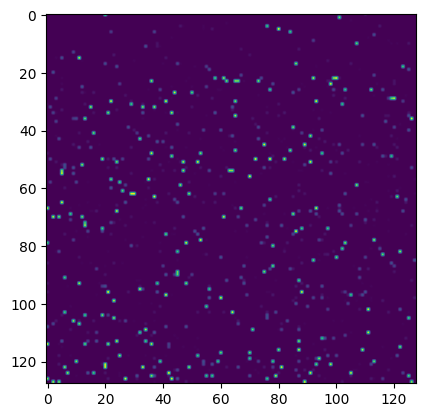

In [26]:
a, b = next(iter(train_loader))

plt.imshow(a[0].squeeze().numpy())

In [5]:
num_train_samples=4000
num_val_samples=500
num_test_samples=500

dataset = RtcDataset(
    dataset_name='thick_lines',
    medium_type=medium_type,
    resize_sidelen=None,
    )

assert num_train_samples + num_val_samples + num_test_samples <= len(dataset)

subsets = torch.utils.data.random_split(
    dataset, [num_train_samples, num_val_samples, num_test_samples],
    generator=torch.Generator().manual_seed(42))

In [11]:
subsets[0].indices

[2542,
 430,
 846,
 4406,
 2154,
 4435,
 2792,
 794,
 3822,
 44,
 4048,
 762,
 2378,
 727,
 4037,
 327,
 2507,
 1692,
 1271,
 3304,
 4809,
 2778,
 1311,
 1468,
 3187,
 4763,
 1693,
 2940,
 163,
 2223,
 1222,
 3262,
 2307,
 3930,
 2599,
 3519,
 3983,
 859,
 3672,
 3568,
 866,
 3860,
 1857,
 1181,
 1583,
 238,
 2893,
 2103,
 2525,
 3126,
 3770,
 2573,
 114,
 548,
 3624,
 3564,
 1335,
 3874,
 4380,
 3644,
 3226,
 1108,
 1318,
 205,
 2126,
 2986,
 2663,
 3366,
 4755,
 3069,
 3937,
 929,
 1104,
 640,
 462,
 3184,
 2107,
 2913,
 3798,
 509,
 3014,
 2263,
 4208,
 1556,
 1362,
 2565,
 1695,
 4957,
 3579,
 2586,
 4587,
 2536,
 4349,
 3493,
 2871,
 340,
 3905,
 2342,
 1333,
 1322,
 770,
 2387,
 4537,
 3861,
 585,
 2186,
 1005,
 3414,
 3393,
 1743,
 1475,
 3949,
 1175,
 4415,
 4454,
 2629,
 3388,
 2037,
 1127,
 3452,
 1079,
 1980,
 3091,
 4978,
 3516,
 52,
 4611,
 1258,
 275,
 4243,
 2157,
 37,
 2288,
 3136,
 4578,
 3013,
 456,
 4818,
 4268,
 396,
 131,
 3404,
 4625,
 4480,
 775,
 3502,
 886,
 53